### Supplementary Notebook S1B
---
### STREAM SCoPE2 analysis performed on a monoctye differentiation dataset [(Specht et al., 2020)](https://doi.org/10.1101/665307)

The processed result of this datasest is shown in **Supplementary Figure 1B** of the manuscript.

**Preprint**: [Single-cell proteomic and transcriptomic
analysis of macrophage heterogeneity](https://www.biorxiv.org/content/10.1101/665307v4.full.pdf) 

**Raw Data**: [link](https://scope2.slavovlab.net/docs/data#processed-single-cell-protein-data) 

In [1]:
import stream as st
st.__version__

/Users/qrzhang/anaconda3/envs/stream/lib/python3.7/site-packages/rpy2/robjects/pandas2ri.py:17: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import Index as PandasIndex


'1.0'

In [2]:
st.set_figure_params(dpi=100,style='white',figsize=[5.4,4.8],
                     rc={'image.cmap': 'viridis','lines.markersize':4})

### Read in data

In [3]:
adata=st.read(file_name='SCoPE2_GeneNames.h5ad',
              workdir='./result_stream_SCoPE2_GeneNames_0805')

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Saving results in: ./result_stream_SCoPE2_GeneNames_0805


In [4]:
adata.X = adata.X.toarray()

In [5]:
adata.X

array([[-0.34342456, -0.13379173,  0.12921445, ..., -0.0177372 ,
        -0.1299273 , -0.7857328 ],
       [-0.27356362, -0.13337049, -0.04686752, ..., -0.1092504 ,
         0.1264482 , -0.2061828 ],
       [-0.4545432 ,  0.31088418,  0.17339253, ..., -0.09870619,
         0.3567254 ,  0.1588498 ],
       ...,
       [ 0.03667745, -0.17861138,  0.15350403, ...,  0.00908208,
         0.0543325 ,  0.5151111 ],
       [ 0.16681248,  0.08523677, -0.12039816, ..., -0.1539329 ,
         0.09751768, -0.2859719 ],
       [ 0.10683481,  0.15978284, -0.15788642, ...,  0.2346705 ,
        -0.2987663 , -0.2912859 ]], dtype=float32)

In [6]:
adata.var_names_make_unique()

In [7]:
adata.var

UniProt
SIK1B     A0A0B4J2F2
CSNKA2IP  A0A1B0GTH6
CCDC195   A0A1B0GUA6
SPEM3     A0A1B0GUW6
PVALEF    A0A1B0GWK0
...              ...
CAPN6         Q9Y6Q1
CCDC61        Q9Y6R9
DUSP10        Q9Y6W6
MYO16         Q9Y6X6
COLEC10       Q9Y6Z7

[2772 rows x 1 columns]

### Preprocess
##### It is preprocessed data and there is no need to do filter and normalization again.

In [9]:
### filter
#st.filter_cells(adata,min_n_features= 100)
#st.filter_features(adata,min_n_cells = 5)

In [10]:
### Normalize gene expression based on library size  
#st.normalize(adata,method='lib_size')

### Logarithmize gene expression 
#st.log_transform(adata)

In [8]:
adata

AnnData object with n_obs × n_vars = 1018 × 2772
    obs: 'celltype', 'batch_digest', 'batch_sort', 'batch_chromatography', 'raw.file'
    var: 'UniProt'
    uns: 'workdir'

### Feature selection

using all the features ...
15 PCs are selected


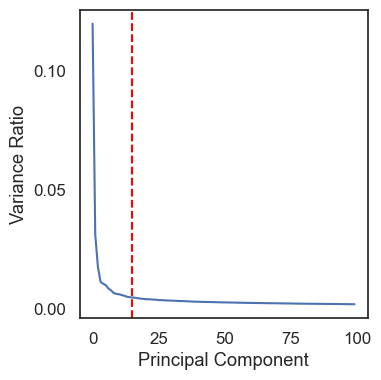

In [9]:
st.select_top_principal_components(adata,n_pc=15,first_pc=True)

### Dimension Reduction

In [10]:
st.dimension_reduction(adata,method='mlle',feature='top_pcs',n_components=3,n_neighbors=15,n_jobs=8)

feature top_pcs is being used ...
8 cpus are being used ...


In [11]:
st.plot_dimension_reduction(adata,color=['celltype'],
                            n_components=3,show_graph=False,show_text=False, plotly=True)

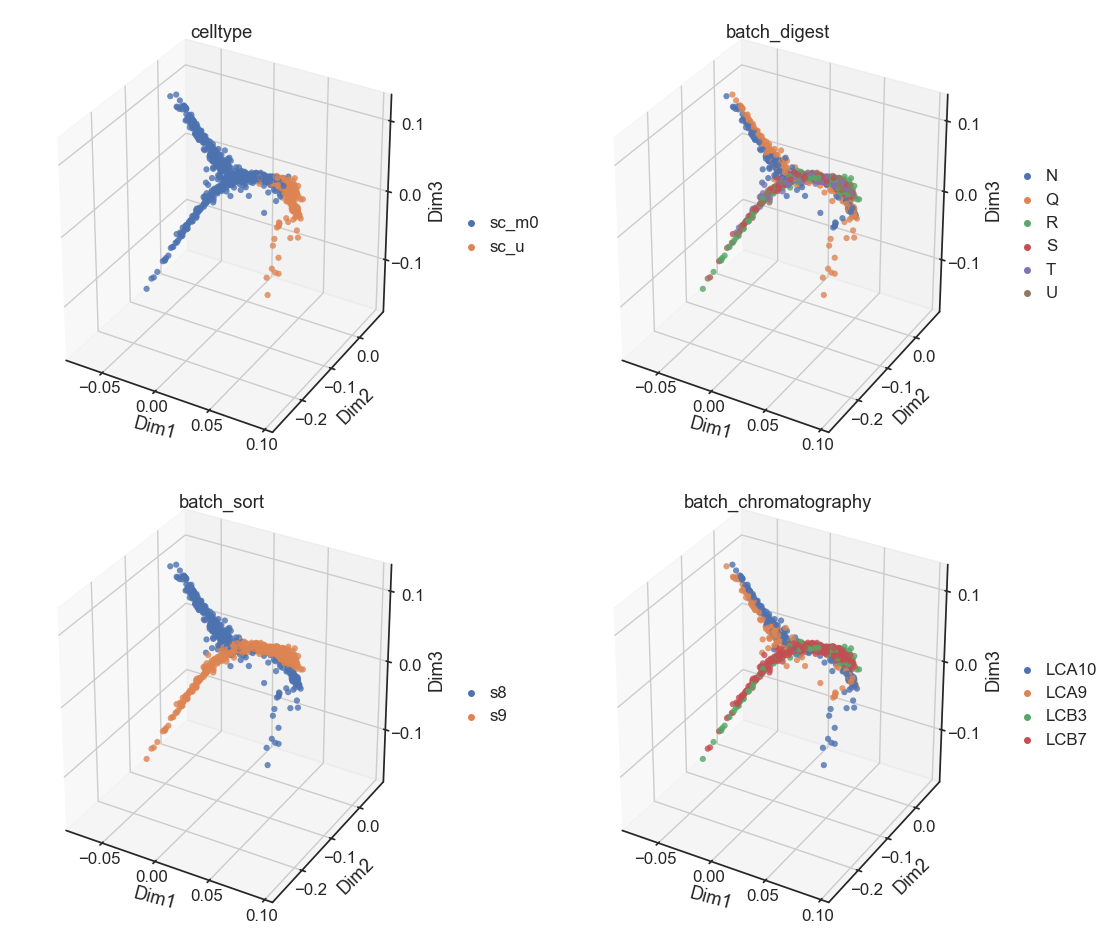

In [12]:
st.plot_dimension_reduction(adata,color=['celltype','batch_digest','batch_sort', 'batch_chromatography'],
                            n_components=3,show_graph=False,show_text=False, fig_ncol= 2)

### Trajectory Inference

In [13]:
st.seed_elastic_principal_graph(adata,n_clusters=10)

Seeding initial elastic principal graph...
Clustering...
K-Means clustering ...
The number of initial nodes is 10
Calculatng minimum spanning tree...
Number of initial branches: 5


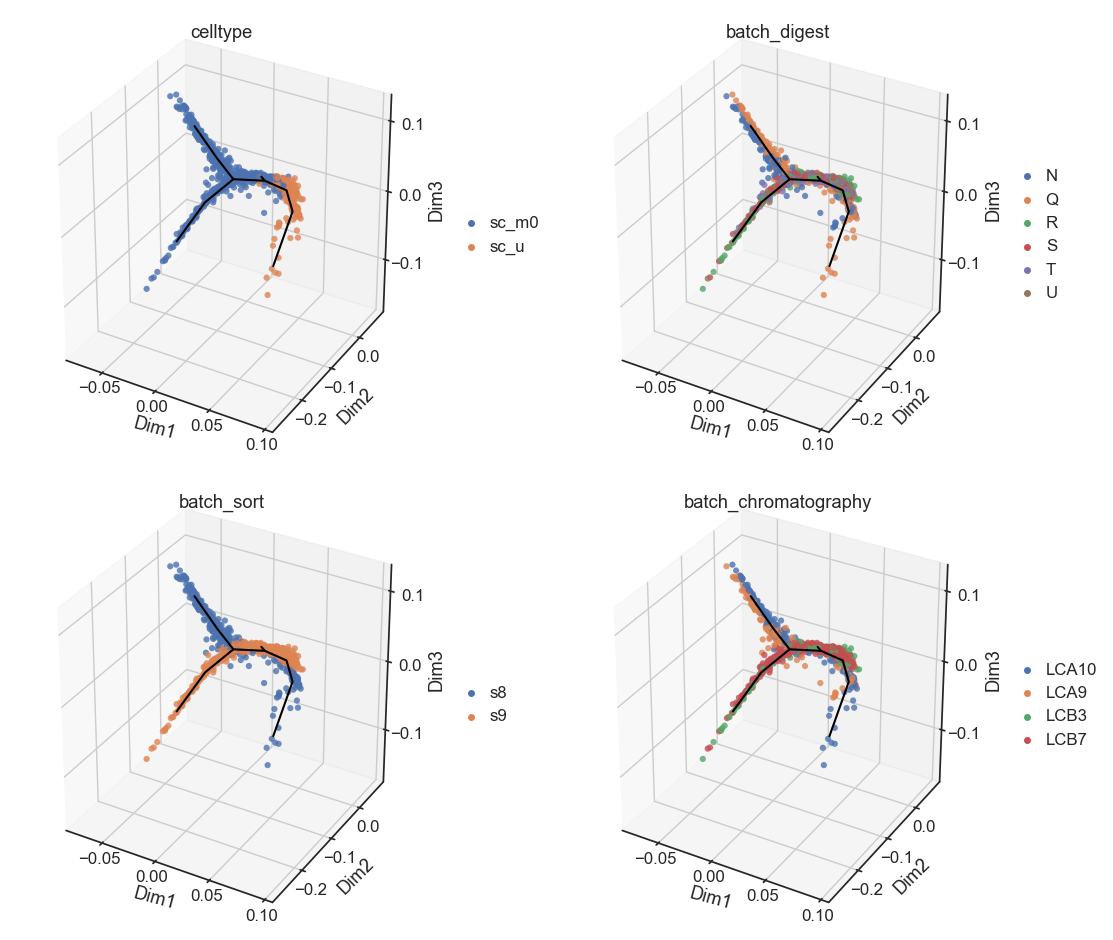

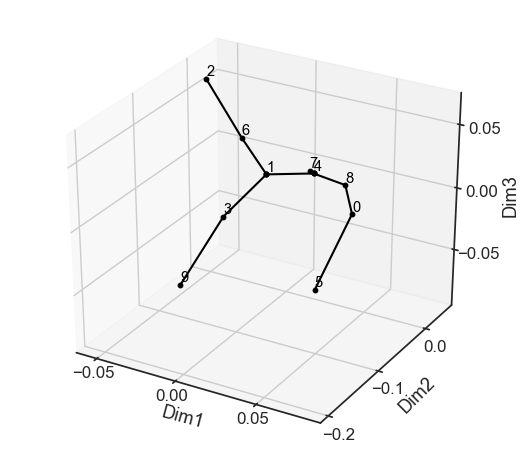

In [14]:
st.plot_dimension_reduction(adata,color=['celltype','batch_digest','batch_sort','batch_chromatography'],
                            n_components=3,show_graph=True,show_text=False, fig_ncol= 2)
st.plot_branches(adata,show_text=True)

In [15]:
st.elastic_principal_graph(adata,epg_alpha=0.2,epg_mu=0.05,epg_lambda=0.05)

Learning elastic principal graph...
[1]
 "Constructing tree 1 of 1 / Subset 1 of 1"


[1]
 "Computing EPG with 50 nodes on 1018 points and 3 dimensions"


[1]
 "Using a single core"


Nodes = 
10
 
11
 
12
 
13
 
14
 
15
 
16
 
17
 
18
 
19
 
20
 
21
 
22
 
23
 
24
 
25
 
26
 
27
 
28
 
29
 
30
 
31
 
32
 
33
 
34
 
35
 
36
 
37
 
38
 
39
 
40
 
41
 
42
 
43
 
44
 
45
 
46
 
47
 
48
 
49
 


BARCODE	ENERGY	NNODES	NEDGES	NRIBS	NSTARS	NRAYS	NRAYS2	MSE	MSEP	FVE	FVEP	UE	UR	URN	URN2	URSD

1||50
	
0.0003795
	
50
	
49
	
46
	
1
	
0
	
0
	
0.0001847
	
0.0001794
	
0.9374
	
0.9392
	
0.0001827
	
1.204e-05
	
0.0006021
	
0.0301
	
0


7.273 sec elapsed

[[1]]



Number of branches after learning elastic principal graph: 3


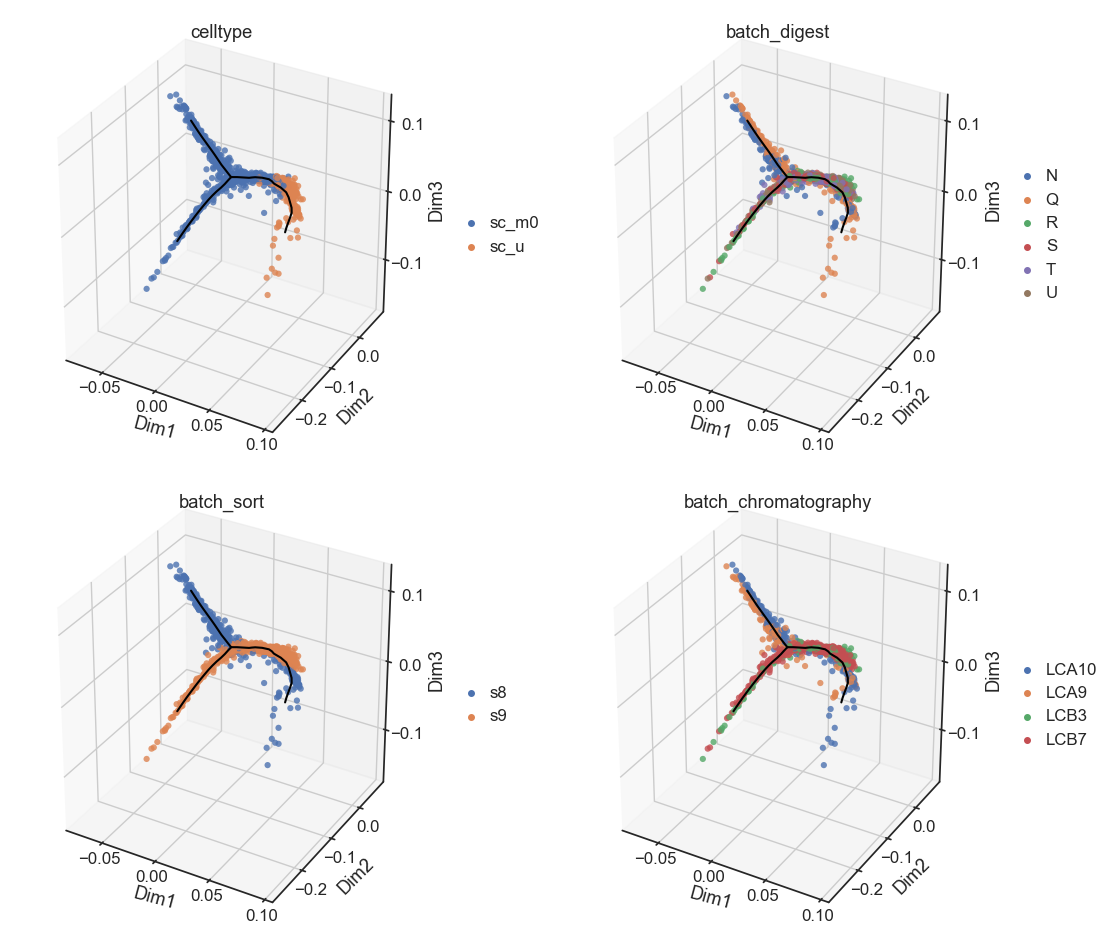

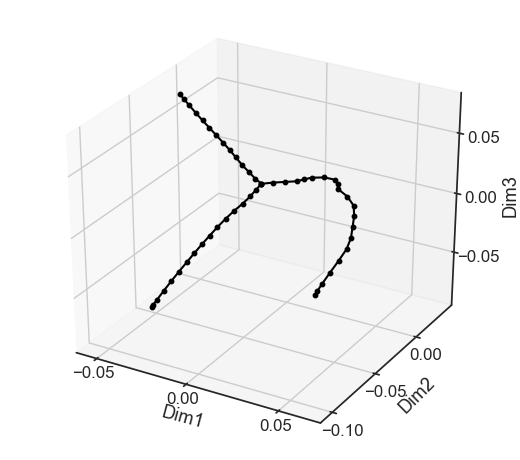

In [16]:
st.plot_dimension_reduction(adata,color=['celltype','batch_digest','batch_sort', 'batch_chromatography'],
                            n_components=3,show_graph=True,show_text=False, fig_ncol= 2)
st.plot_branches(adata,show_text=False)

In [17]:
st.plot_dimension_reduction(adata,color=['celltype'],show_graph=True,plotly=True)

### Trajectory Visulization

##### flat tree

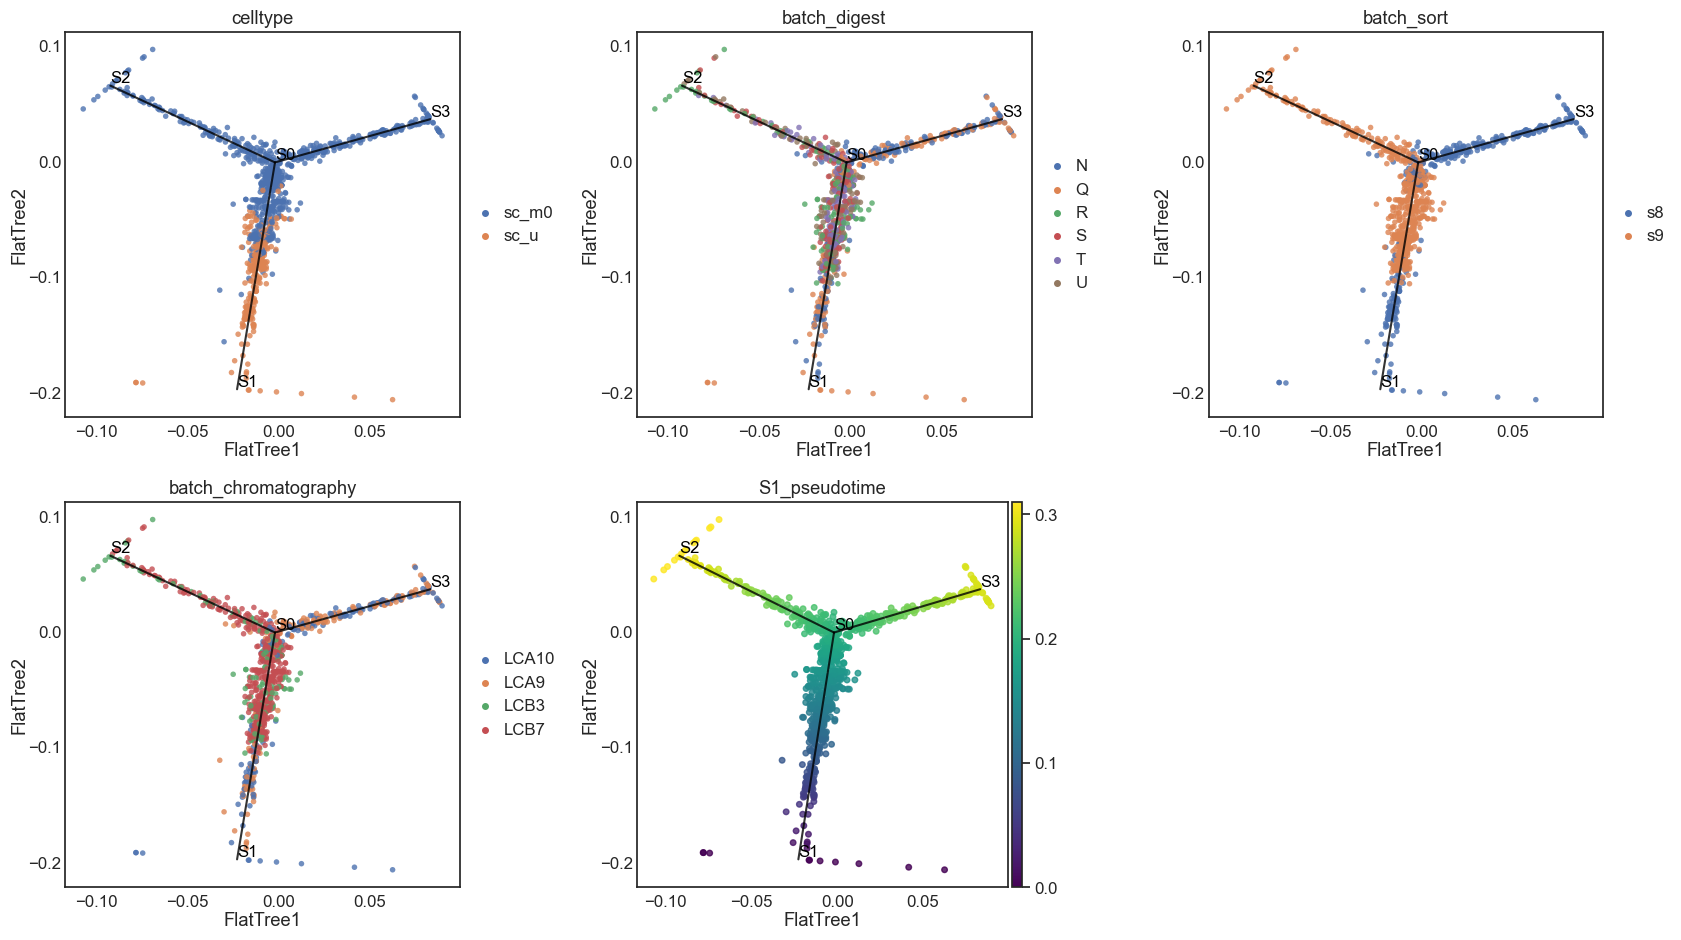

In [18]:
st.plot_flat_tree(adata,color=['celltype','batch_digest','batch_sort', 'batch_chromatography','S1_pseudotime'],
                  dist_scale=0.5,show_graph=True,show_text=True)

##### Stream plot at single cell 

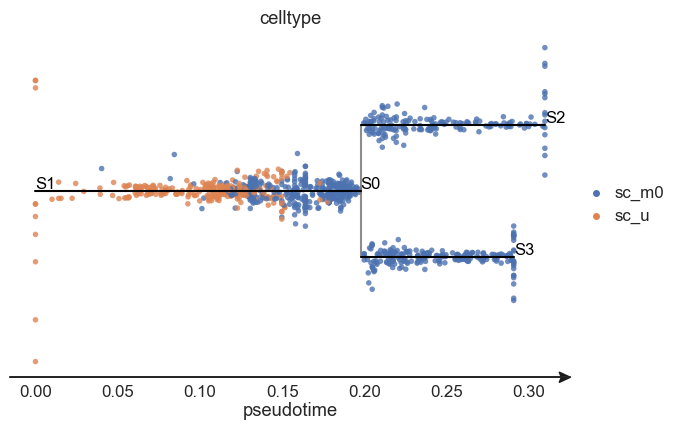

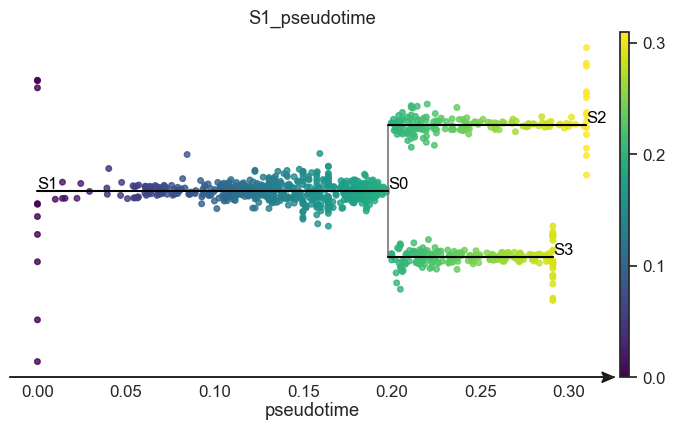

In [19]:
st.plot_stream_sc(adata,root='S1',color=['celltype','S1_pseudotime'],
                  dist_scale=0.3,show_graph=True,show_text=True)

##### stream plot

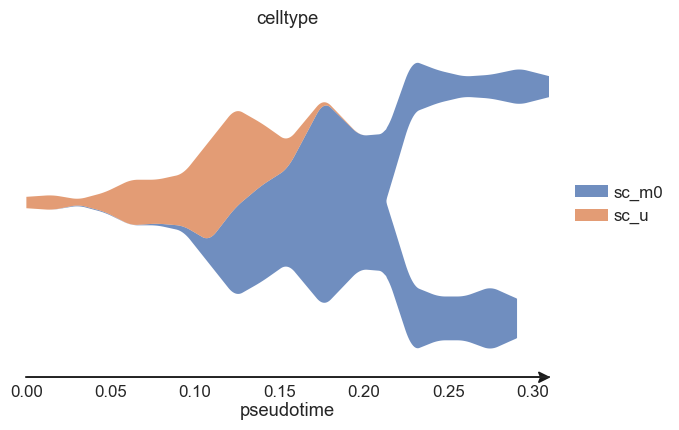

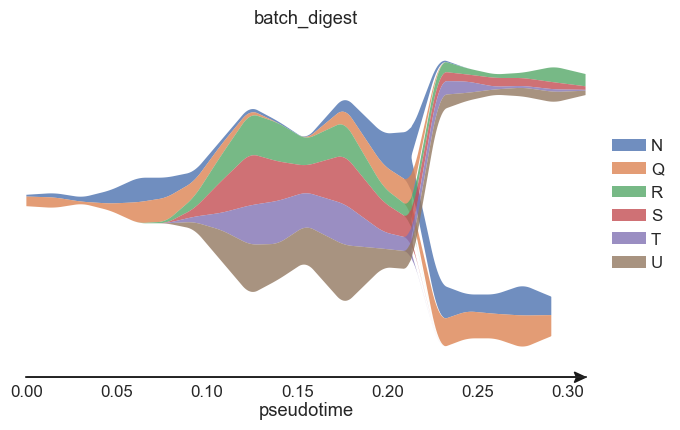

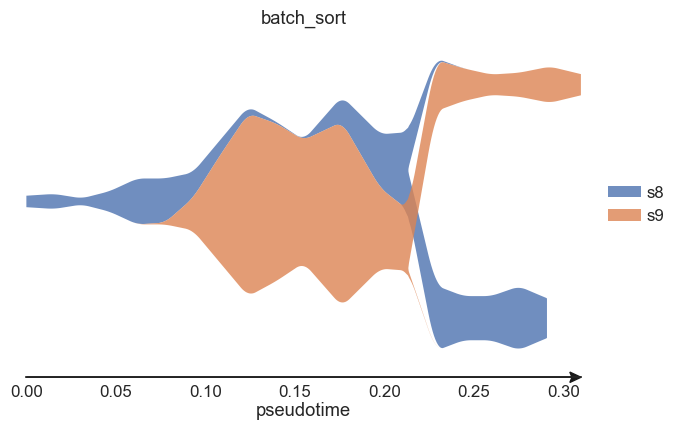

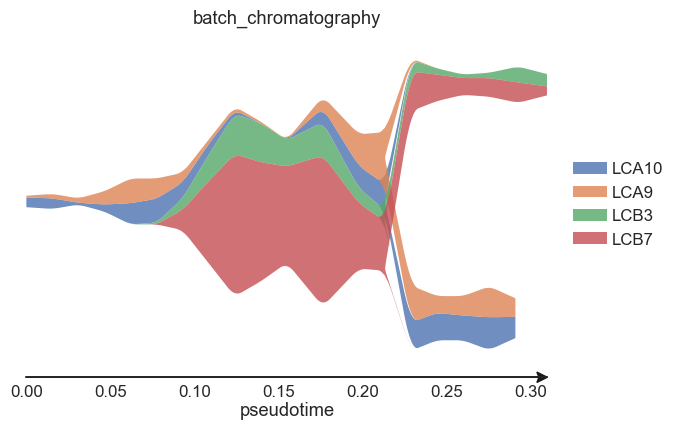

In [20]:
st.plot_stream(adata,root='S1',color=['celltype','batch_digest','batch_sort', 'batch_chromatography'])

### Marker genes detection

##### 1) detect marker genes for each leaf branch 

In [21]:
st.detect_leaf_markers(adata,cutoff_zscore=1.0,
                      cutoff_pvalue=0.01, root='S1',n_jobs=4)

Scanning all features ...
Filtering out markers that are expressed in less than 5 cells ...
4 cpus are being used ...
2772 markers are being scanned ...


In [22]:
adata.uns['leaf_markers_all'].head()

zscore H_statistic      H_pvalue  S1S0_pvalue   S0S2_pvalue  \
ARMCX5  1.37556     535.174  6.14428e-117            1  1.01239e-128   
LMNA    1.04473     502.397  8.05267e-110  3.5969e-123             1   
MYOF    1.41391     469.984  8.79586e-103            1   1.55145e-87   
IL26   -1.38597      468.17  2.17902e-102            1  1.10155e-105   
MYO9A  -1.38544     466.199  5.83739e-102            1  1.71899e-104   

         S0S3_pvalue  
ARMCX5  2.81095e-101  
LMNA     2.41539e-10  
MYOF    3.25671e-101  
IL26     4.24894e-81  
MYO9A    3.00873e-81

In [23]:
adata.uns['leaf_markers'][('S1','S0')].head()

zscore H_statistic      H_pvalue S1S0_pvalue   S0S2_pvalue  \
ARMCX5  1.37556     535.174  6.14428e-117           1  1.01239e-128   
MYOF    1.41391     469.984  8.79586e-103           1   1.55145e-87   
IL26   -1.38597      468.17  2.17902e-102           1  1.10155e-105   
MYO9A  -1.38544     466.199  5.83739e-102           1  1.71899e-104   
ANXA2  -1.38974     462.097  4.53816e-101           1  9.64026e-103   

         S0S3_pvalue  
ARMCX5  2.81095e-101  
MYOF    3.25671e-101  
IL26     4.24894e-81  
MYO9A    3.00873e-81  
ANXA2    1.12878e-80

In [24]:
adata.uns['leaf_markers'][('S0','S2')].head()

zscore H_statistic      H_pvalue   S1S0_pvalue S0S2_pvalue  \
LMNA    1.04473     502.397  8.05267e-110   3.5969e-123           1   
S100A4  1.05462      446.61   1.04665e-97  3.63757e-105           1   
CMYA5    1.0228     446.586   1.05968e-97  6.33708e-102           1   
KAZN    1.17224     375.958   2.29972e-82   3.00186e-90           1   
DSC3    1.01471     372.322   1.41694e-81   4.80956e-80           1   

        S0S3_pvalue  
LMNA    2.41539e-10  
S100A4  1.27868e-09  
CMYA5   2.69919e-07  
KAZN    5.03773e-14  
DSC3    5.63976e-06

In [25]:
adata.uns['leaf_markers'][('S0','S3')].head()

zscore H_statistic     H_pvalue  S1S0_pvalue  S0S2_pvalue  \
WASHC2C  1.21633     354.675  9.62116e-78  8.17844e-90  2.93875e-14   
TENM1    1.01602     321.115  1.86555e-70  2.35202e-72   5.3361e-05   
CCDC71L  1.30976     299.455  9.42102e-66  3.80101e-77  1.18771e-20   
TMEM214  1.11779     206.272  1.61637e-45  6.48322e-46    2.164e-05   
ALDOA    1.13945     188.583  1.12139e-41  6.92217e-42  3.15111e-05   

        S0S3_pvalue  
WASHC2C           1  
TENM1             1  
CCDC71L           1  
TMEM214           1  
ALDOA             1

In [26]:
adata.var_names

Index(['SIK1B', 'CSNKA2IP', 'CCDC195', 'SPEM3', 'PVALEF', 'UBA6', 'ESYT2',
       'SHTN1', 'ARHGAP10', 'TSPAN11',
       ...
       'EMILIN1', 'BZW2', 'SNCAIP', 'SQOR', 'LAMC3', 'CAPN6', 'CCDC61',
       'DUSP10', 'MYO16', 'COLEC10'],
      dtype='object', length=2772)

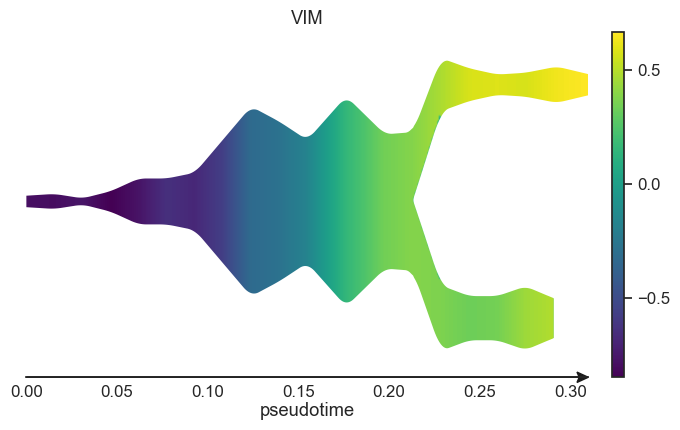

In [27]:
st.plot_stream(adata,root='S1',color=['VIM'])

##### 2) detect transition genes for each branch

In [30]:
st.detect_transition_markers(adata,cutoff_spearman=0.4,
                             cutoff_logfc=0.25, root='S1',n_jobs=4)

Scanning all features ...
Importing precomputed scaled marker expression matrix ...
2772 markers are being scanned ...


In [31]:
adata.uns['transition_markers'][('S1','S0')].head()

stat     logfc           pval           qval
SMIM22 -0.773533  0.991394  1.132232e-130  1.877240e-127
SIAE   -0.764478  0.998023  7.290470e-126  6.043800e-123
VIM     0.762843  2.071955  5.106783e-125  2.822349e-122
TIE1   -0.752619  1.035358  6.956299e-120  2.883386e-117
NCL    -0.741155  1.091076  2.033171e-114  6.741996e-112

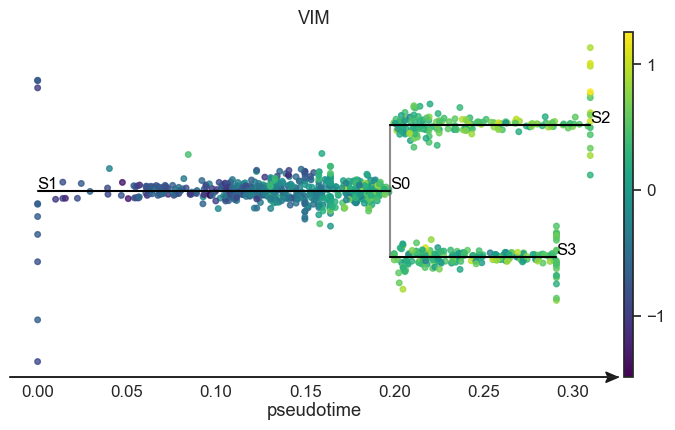

In [33]:
st.plot_stream_sc(adata,root='S1',color=['VIM'],
                  dist_scale=0.3,show_graph=True,show_text=True)

##### 3) detect marker genes that are differentially expressed between pairs of branches

In [34]:
st.detect_de_markers(adata,cutoff_zscore=1,
                     cutoff_logfc=0.25, root='S1',n_jobs=4)

Scanning all features ...
Importing precomputed scaled marker expression matrix ...
2772 markers are being scanned ...


In [35]:
adata.uns['de_markers_greater'][(('S0', 'S2'), ('S0', 'S3'))].head()

z_score        U     logfc   mean_up  mean_down          pval  \
SRCAP   11.870467  28664.5  1.053660  1.505821   0.724640  1.695237e-32   
PIN1    11.687793  28479.0  1.123977  1.545971   0.708496  1.480213e-31   
SAFB    11.034224  27819.0  0.941721  1.426389   0.741910  2.627383e-28   
SLC7A5  10.521577  27301.0  0.868042  1.385126   0.758270  6.907530e-26   
SF3A1   10.188937  26965.0  0.906011  1.485311   0.791956  2.233132e-24   

                qval  
SRCAP   1.273123e-29  
PIN1    5.558202e-29  
SAFB    6.577214e-26  
SLC7A5  1.296889e-23  
SF3A1   3.354164e-22

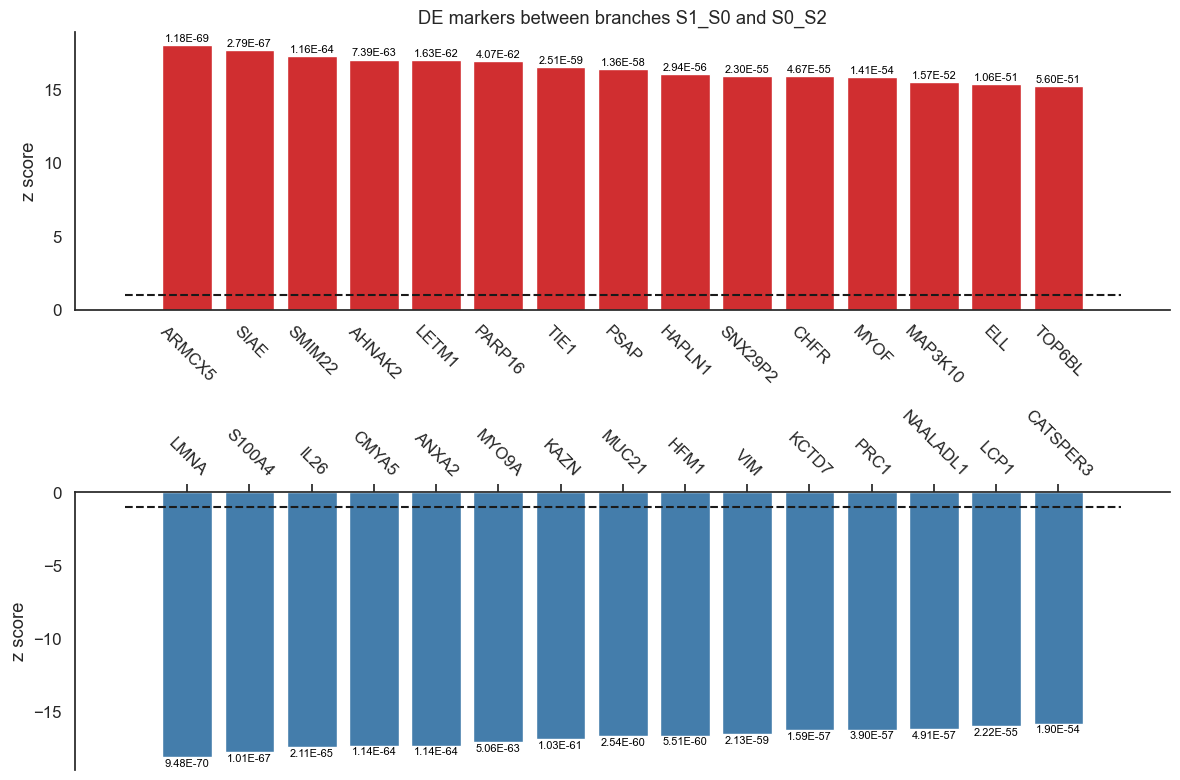

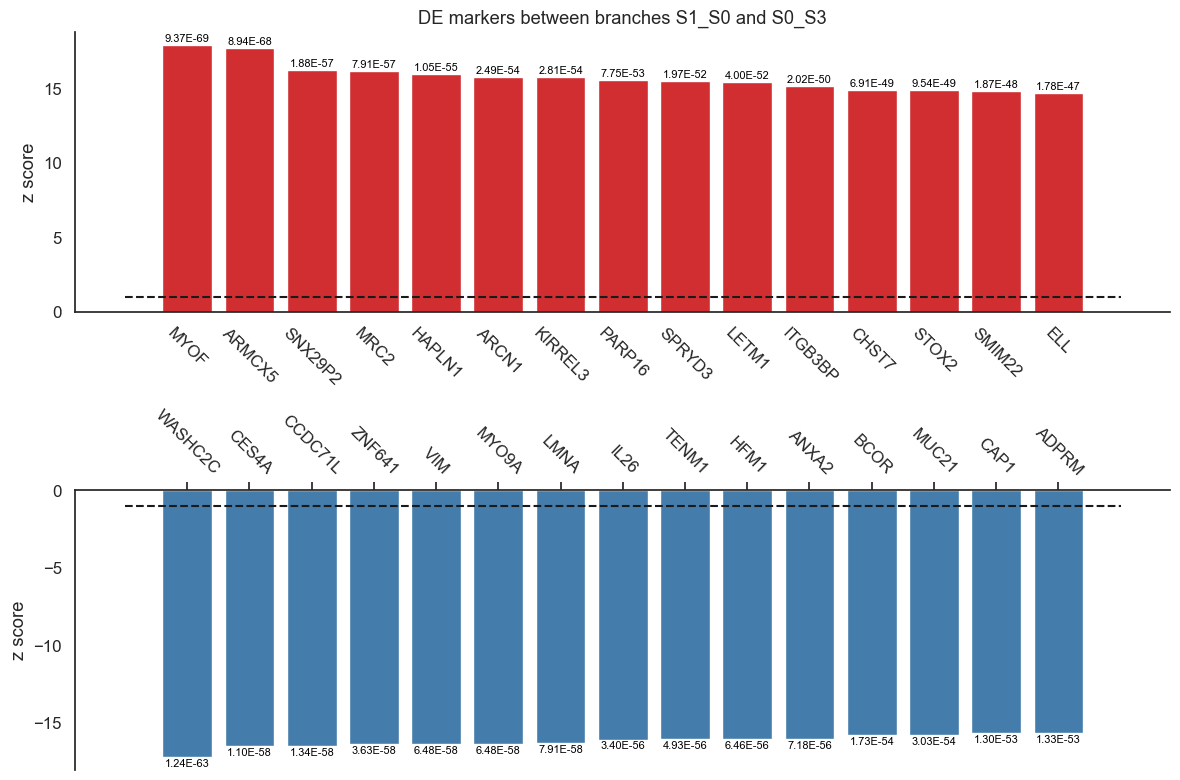

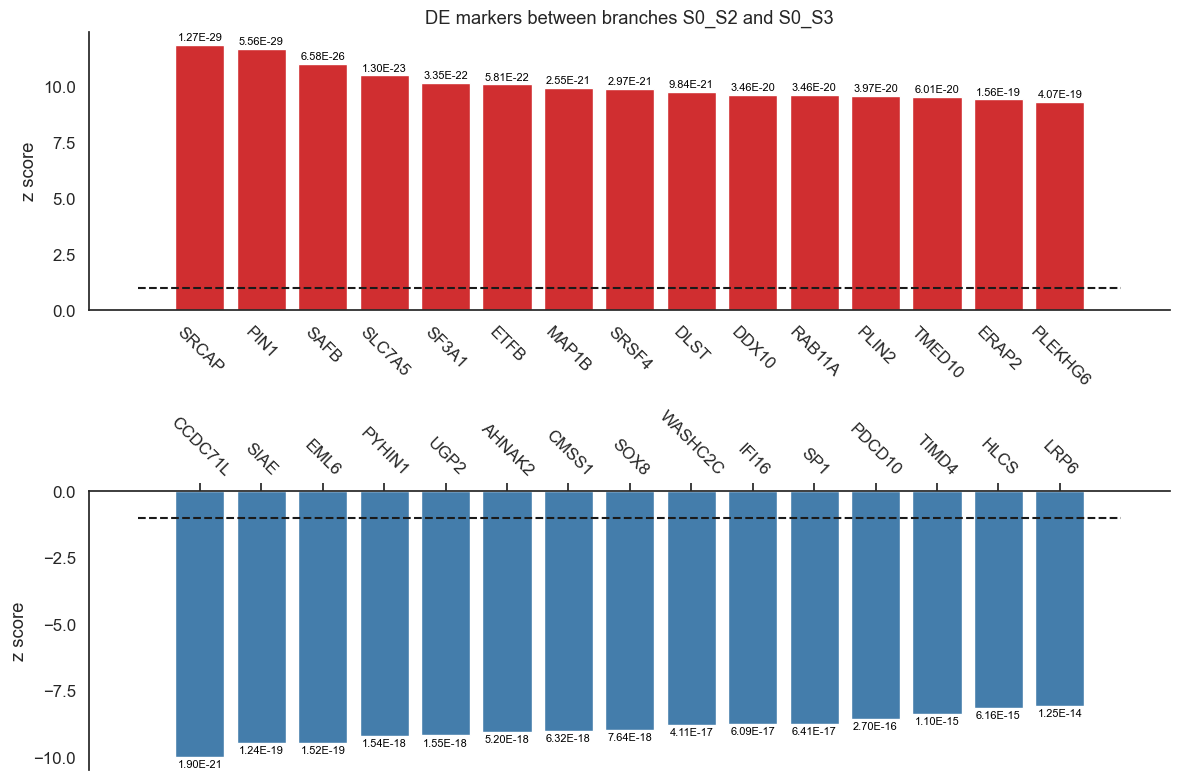

In [36]:
st.plot_de_markers(adata)

##### 4) detect cell population-specific markers

In [37]:
st.detect_markers(adata,ident='celltype',cutoff_zscore=1.0,cutoff_pvalue=0.01)

Scanning all features ...
Importing precomputed scaled marker expression matrix ...
2772 markers are being scanned ...


In [38]:
adata.uns['markers_celltype']['sc_u'].head()

zscore H_statistic      H_pvalue         sc_m0
ANXA2      -1     533.025  6.20795e-118  5.12273e-166
ARMCX5      1     442.341   3.34952e-98   4.3652e-128
MYO9A      -1     441.213   5.89396e-98  1.18323e-127
SMIM22      1      425.22   1.78336e-94  1.33499e-121
ACACB       1     418.734   4.60212e-93   3.4171e-119

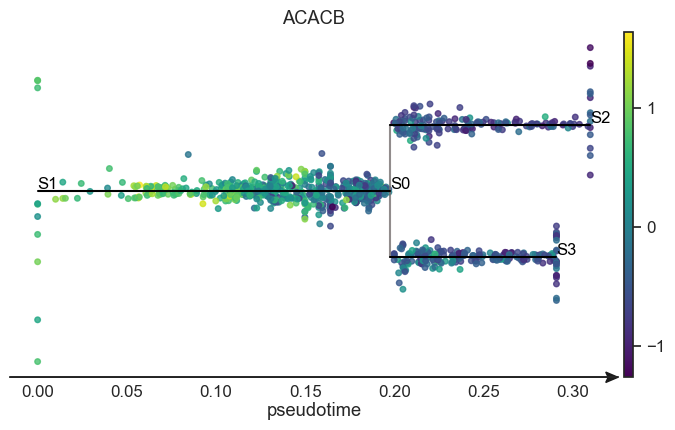

In [39]:
st.plot_stream_sc(adata,root='S1',color=['ACACB'],
                  dist_scale=0.3,show_graph=True,show_text=True)

In [40]:
adata.uns['markers_celltype']['sc_m0'].head()

zscore H_statistic      H_pvalue          sc_u
LMNA        1     452.371  2.19836e-100  5.62828e-132
KLHL36     -1     431.128   9.23481e-96  8.10958e-124
TIE1       -1     424.282    2.8535e-94   2.9877e-121
SQOR        1     421.199   1.33788e-93  4.18303e-120
CMYA5       1     414.443   3.95425e-92  1.29656e-117

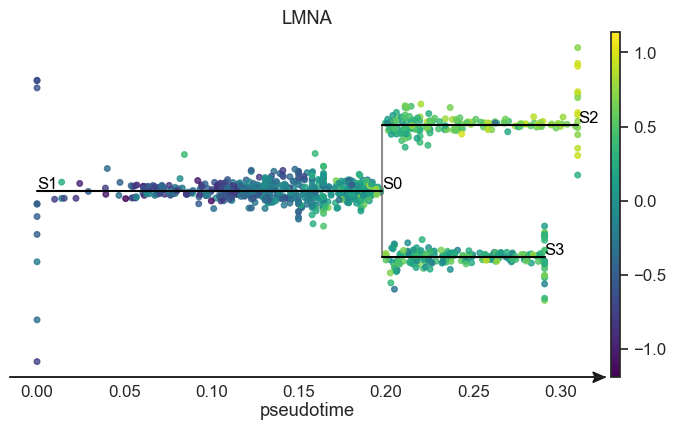

In [41]:
st.plot_stream_sc(adata,root='S1',color=['LMNA'],
                  dist_scale=0.3,show_graph=True,show_text=True)

## save results

In [42]:
st.write(adata,file_name='stream_result_var.pkl')

In [43]:
adata.obs_keys()

['celltype',
 'batch_digest',
 'batch_sort',
 'batch_chromatography',
 'raw.file',
 'kmeans',
 'node',
 'branch_id',
 'branch_id_alias',
 'branch_lam',
 'branch_dist',
 'S0_pseudotime',
 'S3_pseudotime',
 'S1_pseudotime',
 'S2_pseudotime']

In [44]:
st.save_vr_report(adata,ann_list=['S1_pseudotime','celltype','branch_id_alias'],
                  gene_list=adata.var_names.to_list())

STREAM: graph finished!
Generating gene expression of cells ...
STREAM: cells finished!
stream_vr_report.zip is saved at ./result_stream_SCoPE2_GeneNames_0805


<Figure size 540x480 with 0 Axes>

Depending on the desired annotations and genes to be visualized by the user, the following command can be executed to create *singlecellVR*-compatible .JSON object. 

`scvr -f ./stream_result_var.pkl -t STREAM -a ANNOTATIONS [-g GENES] [-o OUTPUT]`